In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import precompute_beta_ols

In [2]:
# Load and preprocess COMPAS data
df = pd.read_csv('./raw_data/compas-scores-two-years.csv')
df = df[['compas_screening_date', 'sex', 'race', 'v_decile_score', 'is_recid']]
df = df[df.race.isin(["African-American", "Caucasian", "Hispanic"])]
df['compas_score_scaled'] = df['v_decile_score'] / 10.0
df = df.sort_values(by='compas_screening_date')

y_full = df.is_recid.to_numpy().astype(float)
f_full = df.compas_score_scaled.to_numpy().astype(float)
bias_full = f_full - y_full

dummy_df_races = pd.get_dummies(df.race)
dummy_df_sexes = pd.get_dummies(df.sex)

X_full = np.column_stack([
    np.ones(len(y_full)),
    dummy_df_races.values.astype(float),
    dummy_df_sexes.values.astype(float)
])

In [12]:
# Estimate beta for different values of n
n_values = [50, 100, 500, 1000, 2000]
n_total = len(y_full)
betas = []

for n in n_values:
    idx = np.random.choice(n_total, size=n, replace=False)
    X_sample = X_full[idx]
    bias_sample = bias_full[idx]
    beta = precompute_beta_ols(X_sample, bias_sample, lam=0, n_bootstrap=50)
    betas.append(beta)
    print(beta)

0.041746201923732816
0.01744041096578214
0.0039026226287851517
0.0017999250345565655
0.0009452772442036793


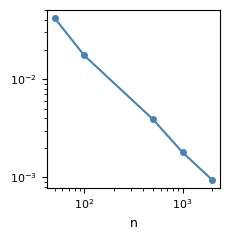

In [14]:
# Plot beta vs n
fig, ax = plt.subplots(figsize=(3, 2.5))
ax.plot(n_values, betas, 'o-', color='steelblue', markersize=4, linewidth=1.5)
ax.set_xlabel('n', fontsize=9)
ax.tick_params(axis='both', labelsize=8)
ax.set_xscale('log')
ax.set_yscale('log')
# square 
ax.set_aspect('equal', 'box')
plt.tight_layout()
plt.savefig('./plots/compas_beta_vs_n.pdf', dpi=300, bbox_inches='tight')
plt.show()